            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


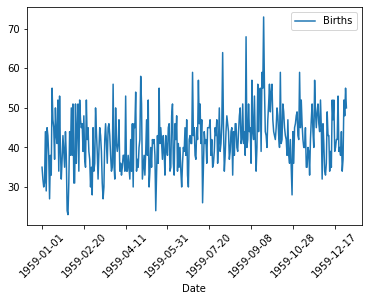


*** Rolling mean
               Births
Date                 
1959-01-01        NaN
1959-01-02        NaN
1959-01-03  32.333333
1959-01-04  31.000000
1959-01-05  35.000000


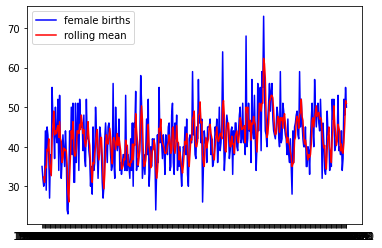

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt

PATH   = "../datasets/"
FILE   = 'daily-total-female-births.csv'
series = read_csv(PATH + FILE, header=0, index_col=0)
print(series.head())
series.plot(rot=45)
plt.show()

# Calculate rolling moving average 3 steps back.
print("\n*** Rolling mean")
rolling      = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(5))

# Plot actual and rolling mean values.
plt.plot(series, color='blue', label='female births')
plt.plot(rolling_mean, color='red', label='rolling mean')
plt.legend()
plt.show()

                  High         Low        Open       Close     Volume  \
Date                                                                    
2019-01-30   23.129999   21.370001   21.490000   23.090000  211421200   
2019-01-31   25.139999   22.830000   23.020000   24.410000  182575600   
2019-02-01   24.840000   24.070000   24.610001   24.510000  105356200   
2019-02-04   24.660000   24.070000   24.430000   24.129999   70843800   
2019-02-05   23.860001   22.980000   23.420000   23.309999  122226000   
...                ...         ...         ...         ...        ...   
2022-01-28  105.400002   99.349998  101.550003  105.239998   98749500   
2022-01-31  114.309998  106.900002  107.930000  114.250000   97206000   
2022-02-01  117.260002  112.730003  116.750000  116.779999  122467900   
2022-02-02  130.059998  120.639999  129.889999  122.760002  180065000   
2022-02-03  125.370003  118.816002  120.320000  120.080002  100910406   

             Adj Close  
Date                    


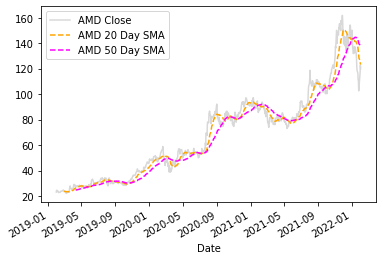

In [2]:
import datetime
import pandas_datareader  as pdr
import matplotlib.pyplot as plt

def getStock(stk, ttlDays):
    numDays = int(ttlDays)
    dt = datetime.date.today()
    dtPast = dt + datetime.timedelta(days=-numDays)
    df = pdr.get_data_yahoo(stk,
                            start=datetime.datetime(dtPast.year, dtPast.month,
                                                    dtPast.day),
                            end=datetime.datetime(dt.year, dt.month, dt.day))
    return df

df = getStock('AMD', 1100)
print(df)

rolling_mean  = df['Close'].rolling(window=20).mean()
rolling_mean2 = df['Close'].rolling(window=50).mean()

#plt.figure(figsize=(10,30))
df['Close'].plot(label='AMD Close ', color='gray', alpha=0.3)
rolling_mean.plot(label='AMD 20 Day SMA', style='--', color='orange')
rolling_mean2.plot(label='AMD 50 Day SMA', style='--',color='magenta')

plt.legend()
plt.show()

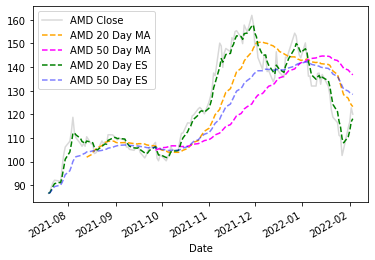

In [7]:
import datetime
import pandas_datareader  as pdr
import matplotlib.pyplot as plt

def getStock(stk, ttlDays):
    numDays = int(ttlDays)
    dt = datetime.date.today()
    dtPast = dt + datetime.timedelta(days=-numDays)
    df = pdr.get_data_yahoo(stk,
                            start=datetime.datetime(dtPast.year, dtPast.month,
                                                    dtPast.day),
                            end=datetime.datetime(dt.year, dt.month, dt.day))
    return df

df = getStock('AMD', 200)

# Calculating the moving averages.
rolling_mean  = df['Close'].rolling(window=20).mean()
rolling_mean2 = df['Close'].rolling(window=50).mean()

# Calculate the exponentially smoothed series.
exp20 = df['Close'].ewm(alpha=0.4).mean()
exp50 = df['Close'].ewm(alpha=0.05).mean()

#plt.figure(figsize=(10,30))
df['Close'].plot(label='AMD Close ', color='gray', alpha=0.3)
rolling_mean.plot(label='AMD 20 Day MA', style='--', color='orange')
rolling_mean2.plot(label='AMD 50 Day MA', style='--',color='magenta')
exp20.plot(label='AMD 20 Day ES', style='--',color='green')
exp50.plot(label='AMD 50 Day ES', style='--',color='blue', alpha=0.5)
plt.legend()
plt.show()

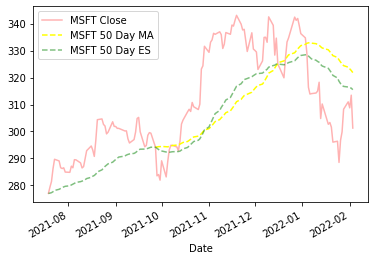

In [6]:
import datetime
import pandas_datareader  as pdr
import matplotlib.pyplot as plt

def getStock(stk, ttlDays):
    numDays = int(ttlDays)
    dt = datetime.date.today()
    dtPast = dt + datetime.timedelta(days=-numDays)
    df = pdr.get_data_yahoo(stk,
                            start=datetime.datetime(dtPast.year, dtPast.month,
                                                    dtPast.day),
                            end=datetime.datetime(dt.year, dt.month, dt.day))
    return df

df = getStock('MSFT', 200)

# Calculating the moving averages.
rolling_mean = df['Close'].rolling(window=50).mean()

# Calculate the exponentially smoothed series.
exp50 = df['Close'].ewm(span=50, adjust=False).mean()

#plt.figure(figsize=(10,30))
df['Close'].plot(label='MSFT Close ', color='red', alpha=0.3)
rolling_mean.plot(label='MSFT 50 Day MA', style='--', color='yellow')
exp50.plot(label='MSFT 50 Day ES', style='--',color='green', alpha=0.5)
plt.legend()
plt.show()

******************************************************
Lt: 50
St: 20
-------------------------------------------------------
Buy and hold closing balance: $51996.67
-------------------------------------------------------
       buyDt       buy$     sellDt       sell$       balance
0 2019-01-31  24.410000 2019-02-05   23.309999   9550.099844
1 2019-02-21  23.920000 2019-03-06   22.410000   8947.609753
2 2019-03-19  26.000000 2019-09-09   30.500000  10495.609753
3 2019-10-23  31.360001 2020-03-12   39.009998  13050.708988
4 2020-04-13  50.939999 2021-02-23   84.739998  21703.508793
5 2021-06-17  84.559998 2022-01-20  121.889999  31259.989262

Moving average strategy closing balance: $31259.99


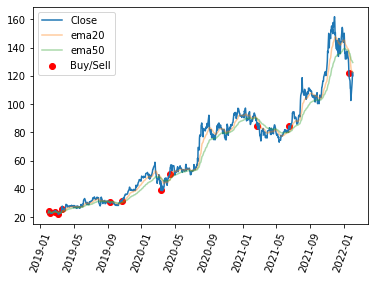

In [11]:
import datetime
import pandas_datareader  as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Show all columns.
pd.set_option('display.max_columns', None)

# Increase number of columns that display on one line.
pd.set_option('display.width', 1000)

def getStock(stk, ttlDays):
    numDays = int(ttlDays)
    dt = datetime.date.today()
    dtPast = dt + datetime.timedelta(days=-numDays)
    df = pdr.get_data_yahoo(stk,
                            start=datetime.datetime(dtPast.year, dtPast.month,
                                                    dtPast.day),
                            end=datetime.datetime(dt.year, dt.month, dt.day))
    return df

def getNewBalance(startBalance, startPrice, endPrice):
    qty          = int(startBalance / startPrice)
    cashLeftOver = startBalance - qty * startPrice
    endValue     = qty * endPrice
    balance      = cashLeftOver + endValue
    return balance

def showBuyAndHoldEarnings(df, balance):
    startClosePrice = df.iloc[0]['Close']
    endClosePrice   = df.iloc[len(df) - 1]['Close']
    newBalance      = getNewBalance(balance, startClosePrice, endClosePrice)
    print("Buy and hold closing balance: $" + str(round(newBalance, 2)))

def showStrategyEarnings(df, balance, lt, st):
    buyPrice = 0
    buyDate  = None
    sellDate = None
    bought   = False

    buySellDates = []
    prices = []

    dfStrategy = pd.DataFrame(columns=['buyDt', 'buy$', 'sellDt',
                                       'sell$', 'balance' ])
    dates = list(df.index)
    for i in range(0, len(df)):
        if(df.iloc[i]['Buy'] and not bought):
            buyPrice = df.iloc[i]['Close']
            buyDate  = dates[i]
            bought   = True
            buySellDates.append(buyDate)
            prices.append(buyPrice)

        elif(df.iloc[i]['Sell'] and bought):
            sellPrice   = df.iloc[i]['Close']
            balance     = getNewBalance(balance, buyPrice, sellPrice)
            sellDate    = dates[i]
            buySellInfo =  { 'buyDt':buyDate, 'buy$':buyPrice,
                             'sellDt':sellDate, 'sell$':sellPrice,
                             'balance':balance,}
            dfStrategy = dfStrategy.append(buySellInfo, ignore_index=True)
            bought     = False
            buySellDates.append(sellDate)
            prices.append(sellPrice)

    print(dfStrategy)
    print("\nMoving average strategy closing balance: $" + str(round(balance, 2)))
    return buySellDates, prices

def showBuyAndSellDates(df, startBalance):
    strategyDates, strategyPrices = showStrategyEarnings(df, startBalance, lt, st)
    plt.plot(df.index, df['Close'], label='Close')
    plt.plot(df.index, df['ema20'], label='ema20', alpha=0.4)
    plt.plot(df.index, df['ema50'], label='ema50', alpha=0.4)
    plt.scatter(strategyDates, strategyPrices, label='Buy/Sell', color='red')
    plt.xticks(rotation=70)
    plt.legend()
    plt.show()

def showInvestmentDifferences(dfStock, lt, st):
    df = dfStock.copy()
    df['ema50'] = df['Close'].ewm(span=lt).mean()
    df['ema20'] = df['Close'].ewm(span=st).mean()

    # Remove nulls.
    df.dropna(inplace=True)
    df.round(3)
    own_positions = np.where(df['ema20'] > df['ema50'], 1, 0)
    df['Position'] = own_positions
    df.round(3)

    df['Buy']  = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
    df['Sell'] = (df['Position'] == 0) & (df['Position'].shift(1) == 1)

    START_BALANCE = 10000

    print("-------------------------------------------------------")
    showBuyAndHoldEarnings(df, START_BALANCE)
    print("-------------------------------------------------------")
    showBuyAndSellDates(df, START_BALANCE)


longterms   = [50]
shortterms  = [20]
dfStock     = getStock('AMD', 1100)

for lt in longterms:
    for st in shortterms:
        print("\b******************************************************")
        print("Lt: " + str(lt))
        print("St: " + str(st))
        showInvestmentDifferences(dfStock, lt,st)

******************************************************
Lt: 40
St: 20
-------------------------------------------------------
Buy and hold closing balance: $11019.82
-------------------------------------------------------
       buyDt       buy$     sellDt      sell$       balance
0 2019-01-31  73.279999 2019-05-03  77.470001  10569.840332
1 2019-07-11  77.570000 2019-07-18  74.839996  10198.559875
2 2019-11-07  73.010002 2019-11-13  68.800003   9613.370003
3 2019-12-23  70.290001 2020-01-17  68.559998   9378.089546
4 2020-05-27  46.240002 2020-07-01  43.709999   8867.029022
5 2020-11-19  37.400002 2021-07-19  55.349998  13121.178299
6 2021-09-29  59.880001 2021-12-16  61.369999  13447.487831

Moving average strategy closing balance: $13447.49


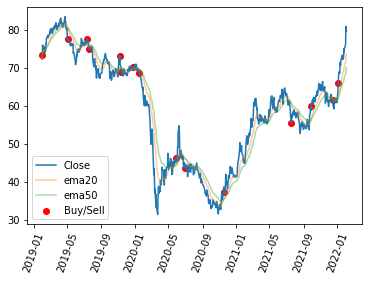

In [14]:
import datetime
import pandas_datareader  as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Show all columns.
pd.set_option('display.max_columns', None)

# Increase number of columns that display on one line.
pd.set_option('display.width', 1000)

def getStock(stk, ttlDays):
    numDays = int(ttlDays)
    dt = datetime.date.today()
    dtPast = dt + datetime.timedelta(days=-numDays)
    df = pdr.get_data_yahoo(stk,
                            start=datetime.datetime(dtPast.year, dtPast.month,
                                                    dtPast.day),
                            end=datetime.datetime(dt.year, dt.month, dt.day))
    return df

def getNewBalance(startBalance, startPrice, endPrice):
    qty          = int(startBalance / startPrice)
    cashLeftOver = startBalance - qty * startPrice
    endValue     = qty * endPrice
    balance      = cashLeftOver + endValue
    return balance

def showBuyAndHoldEarnings(df, balance):
    startClosePrice = df.iloc[0]['Close']
    endClosePrice   = df.iloc[len(df) - 1]['Close']
    newBalance      = getNewBalance(balance, startClosePrice, endClosePrice)
    print("Buy and hold closing balance: $" + str(round(newBalance, 2)))

def showStrategyEarnings(df, balance, lt, st):
    buyPrice = 0
    buyDate  = None
    sellDate = None
    bought   = False

    buySellDates = []
    prices = []

    dfStrategy = pd.DataFrame(columns=['buyDt', 'buy$', 'sellDt',
                                       'sell$', 'balance' ])
    dates = list(df.index)
    for i in range(0, len(df)):
        if(df.iloc[i]['Buy'] and not bought):
            buyPrice = df.iloc[i]['Close']
            buyDate  = dates[i]
            bought   = True
            buySellDates.append(buyDate)
            prices.append(buyPrice)

        elif(df.iloc[i]['Sell'] and bought):
            sellPrice   = df.iloc[i]['Close']
            balance     = getNewBalance(balance, buyPrice, sellPrice)
            sellDate    = dates[i]
            buySellInfo =  { 'buyDt':buyDate, 'buy$':buyPrice,
                             'sellDt':sellDate, 'sell$':sellPrice,
                             'balance':balance,}
            dfStrategy = dfStrategy.append(buySellInfo, ignore_index=True)
            bought     = False
            buySellDates.append(sellDate)
            prices.append(sellPrice)

    print(dfStrategy)
    print("\nMoving average strategy closing balance: $" + str(round(balance, 2)))
    return buySellDates, prices

def showBuyAndSellDates(df, startBalance):
    strategyDates, strategyPrices = showStrategyEarnings(df, startBalance, lt, st)
    plt.plot(df.index, df['Close'], label='Close')
    plt.plot(df.index, df['ema20'], label='ema20', alpha=0.4)
    plt.plot(df.index, df['ema50'], label='ema50', alpha=0.4)
    plt.scatter(strategyDates, strategyPrices, label='Buy/Sell', color='red')
    plt.xticks(rotation=70)
    plt.legend()
    plt.show()

def showInvestmentDifferences(dfStock, lt, st):
    df = dfStock.copy()
    df['ema50'] = df['Close'].ewm(span=lt).mean()
    df['ema20'] = df['Close'].ewm(span=st).mean()

    # Remove nulls.
    df.dropna(inplace=True)
    df.round(3)
    own_positions = np.where(df['ema20'] > df['ema50'], 1, 0)
    df['Position'] = own_positions
    df.round(3)

    df['Buy']  = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
    df['Sell'] = (df['Position'] == 0) & (df['Position'].shift(1) == 1)

    START_BALANCE = 10000

    print("-------------------------------------------------------")
    showBuyAndHoldEarnings(df, START_BALANCE)
    print("-------------------------------------------------------")
    showBuyAndSellDates(df, START_BALANCE)


longterms   = [40]
shortterms  = [20]
dfStock     = getStock('XOM', 1100)

for lt in longterms:
    for st in shortterms:
        print("\b******************************************************")
        print("Lt: " + str(lt))
        print("St: " + str(st))
        showInvestmentDifferences(dfStock, lt,st)